In [1]:
from google.colab import drive
drive.mount ('/content/drive', force_remount = True)
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

Mounted at /content/drive


In [2]:
!pip install heartpy
import heartpy as hp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 6.6 MB/s eta 0:00:00


In [3]:
path = '/content/drive/Shareddrives/QVAR Respiration/Data/Profi-MEMS Board/P2/Sitting/'
P2_all_files = glob.glob(path+'*.txt')


In [ ]:
path = '/content/drive/Shareddrives/QVAR Respiration/Data/Baseline Data/P2_Raw_Data_Updated/'
P2_all_files = glob.glob(path+'*.csv')

In [ ]:
path = '/content/drive/Shareddrives/QVAR Respiration/Data/Profi-MEMS Board/P3/Sitting/'
P3_all_files = glob.glob(path+'*.txt')


In [ ]:
path = '/content/drive/Shareddrives/QVAR Respiration/Data/Baseline Data/P4_Raw_Data_Updated/'
P4_all_files = glob.glob(path+'*.csv')

In [ ]:
P1_sitting_times = []
P1_sitting_breaths = []
P1_standing_times = []
P1_standing_breaths = []
P1_walking_times = []
P1_walking_breaths = []

for filename in P1_all_files:
  df = pd.read_csv(filename, skiprows=6)
  if 'Sitting' in filename:
    P1_sitting_times.append(df.iloc[:-4,0])
    breaths = (df.iloc[:-4,1])
    min_breaths = min(breaths)
    max_breaths = max(breaths)
    breaths = (breaths - min_breaths)/(max_breaths - min_breaths)
    P1_sitting_breaths.append(breaths)
  if 'Standing' in filename:
    P1_standing_times.append(df.iloc[:-4,0])
    breaths = df.iloc[:-4,1]
    min_breaths = min(breaths)
    max_breaths = max(breaths)
    breaths = (breaths - min_breaths)/(max_breaths - min_breaths)
    P1_standing_breaths.append(breaths)
  if 'Walking' in filename:
    P1_walking_times.append(df.iloc[:-4,0])
    breaths = df.iloc[:-4,1]
    min_breaths = min(breaths)
    max_breaths = max(breaths)
    breaths = (breaths - min_breaths)/(max_breaths - min_breaths)
    P1_walking_breaths.append(breaths)


In [4]:
P2_sitting_breaths = []
for filename in P2_all_files:
  df = pd.read_csv(filename,skiprows=1)
  df['vAFE [LSB] \t'] = df['vAFE [LSB] \t'].apply(lambda x: (str(x).replace("\t", "")))
  df = df.set_axis(['QVAR [LSB]'], axis=1)
  a = pd.to_numeric(df['QVAR [LSB]'], errors='coerce')
  idx = a.isna()
  bad = df[idx]
  df = df.drop(bad.index)
  df['QVAR [LSB]'] = df['QVAR [LSB]'].astype(float)
  P2_sitting_breaths.append(df)

In [10]:
def sitting_plot(df):
  data = (df['QVAR [LSB]'].to_numpy())
  sampling_rate = 200.0
  #filtered = hp.remove_baseline_wander(data,sample_rate = sampling_rate, cutoff = 2.7)
  filtered = hp.filter_signal(data, cutoff = 2.65, sample_rate = sampling_rate, order = 3, filtertype='lowpass')
  #filtered = hp.hampel_correcter(data,sample_rate = sampling_rate)
  #time = np.linspace(0,filtered.shape[0]*(1/sampling_rate),filtered.shape[0])
  #time = df['Timestamp [us]']
  #time = time/60000000
  #df.plot(x='Timestamp [us]', y='QVAR [LSB]')
  plt.plot(filtered)
  plt.xlabel('Samples')
  plt.ylabel('Filtered')

def sitting_measure(df):
  data = df['QVAR [LSB]'].to_numpy()
  sampling_rate = 200.0
  #filtered = hp.remove_baseline_wander(data,sample_rate = sampling_rate, cutoff = 2.7)
  filtered = hp.filter_signal(data, cutoff = 2.65, sample_rate = sampling_rate, order = 3, filtertype='lowpass')
  working_data,measures = hp.process(filtered,sampling_rate)
  return working_data, measures

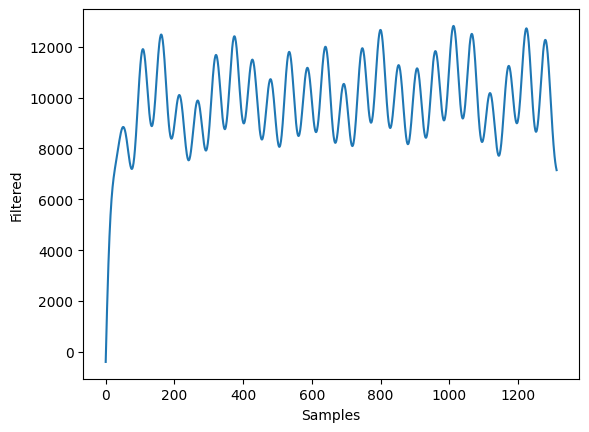

In [11]:
sitting_plot(P2_sitting_breaths[1][195000 :])
x = P2_sitting_breaths[0]
working_data, measures = sitting_measure(x)

In [12]:
measures

{'bpm': 162.14233308877476,
 'ibi': 370.0452488687783,
 'sdnn': 130.9959162693124,
 'sdsd': 113.01231899869464,
 'rmssd': 233.73700052083078,
 'pnn20': 0.7565392354124748,
 'pnn50': 0.756036217303823,
 'hr_mad': 10.0,
 'sd1': 165.25625616020974,
 'sd2': 85.08146316961461,
 's': 44171.559484410616,
 'sd1/sd2': 1.9423297390967789,
 'breathingrate': 0.18341892883345562}

In [ ]:
P3_sitting_breaths = []
for filename in P3_all_files:
  df = pd.read_csv(filename,skiprows=1)
  df['vAFE [LSB] \t'] = df['vAFE [LSB] \t'].apply(lambda x: (str(x).replace("\t", "")))
  df = df.set_axis(['QVAR [LSB]'], axis=1)
  a = pd.to_numeric(df['QVAR [LSB]'], errors='coerce')
  idx = a.isna()
  bad = df[idx]
  df = df.drop(bad.index)
  df['QVAR [LSB]'] = df['QVAR [LSB]'].astype(float)
  P3_sitting_breaths.append(df)

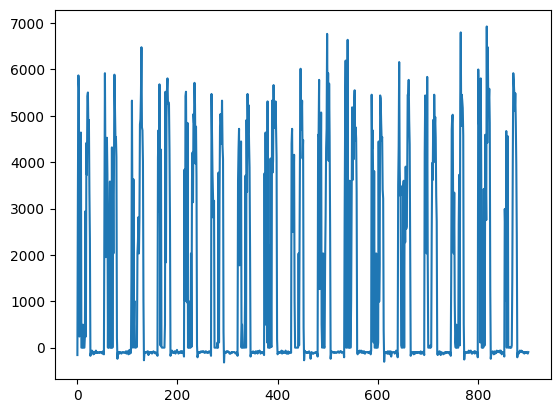

In [ ]:
sitting_plot(P3_sitting_breaths[0][191000 :])
x = P3_sitting_breaths[0]
working_data, measures = sitting_measure(x)

In [ ]:
measures

{'bpm': 184.31946688206787,
 'ibi': 325.52177485620376,
 'sdnn': 136.38443379735003,
 'sdsd': 126.96108660174059,
 'rmssd': 195.8211261880047,
 'pnn20': 0.7399475524475524,
 'pnn50': 0.5603146853146853,
 'hr_mad': 20.0,
 'sd1': 138.20041063013278,
 'sd2': 125.964705687313,
 's': 54690.020029220716,
 'sd1/sd2': 1.0971359784953807,
 'breathingrate': 0.17669628432956383}

In [ ]:
P4_sitting_times = []
P4_sitting_breaths = []
P4_standing_times = []
P4_standing_breaths = []
P4_walking_times = []
P4_walking_breaths = []

for filename in P4_all_files:
  df = pd.read_csv(filename, skiprows=6)
  if 'Sitting' in filename:
    P4_sitting_times.append(df.iloc[:-4,0])
    breaths = (df.iloc[:-4,1])
    min_breaths = min(breaths)
    max_breaths = max(breaths)
    breaths = (breaths - min_breaths)/(max_breaths - min_breaths)
    P4_sitting_breaths.append(breaths)
  if 'Standing' in filename:
    P4_standing_times.append(df.iloc[:-4,0])
    breaths = df.iloc[:-4,1]
    min_breaths = min(breaths)
    max_breaths = max(breaths)
    breaths = (breaths - min_breaths)/(max_breaths - min_breaths)
    P4_standing_breaths.append(breaths)
  if 'Walking' in filename:
    P4_walking_times.append(df.iloc[:-4,0])
    breaths = df.iloc[:-4,1]
    min_breaths = min(breaths)
    max_breaths = max(breaths)
    breaths = (breaths - min_breaths)/(max_breaths - min_breaths)
    P4_walking_breaths.append(breaths)

 **P4 Sitting Data: 15, 15, 16, 14, 14/15, 14, 15, 14, 13, 13**

**P4 Standing Data: 18, 17, 17/18, 16, 14/15, 13/14, 15, 13/14, 14, 13**

**P4 Walking Data: 18, 17, 16, 17/18, 18, 17, 15, 15, 15, 17**

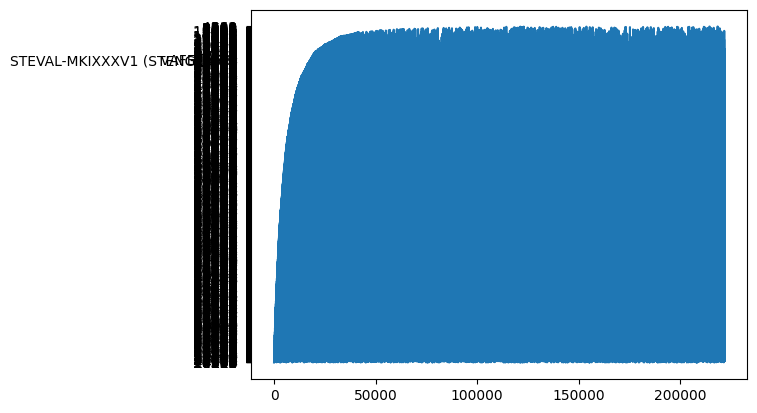

In [ ]:
#for x , y in zip(sitting_times,sitting_breaths):
#  plt.plot(x, y)
plt.plot(P2_sitting_breaths[0])


In [ ]:
# P1_sit_num = []
# for breaths in P1_sitting_breaths:
#   x = sp.signal.find_peaks(breaths,.3)
#   P1_sit_num.append(len(x[0]))
# P1_sit_num

# P1_stand_num = []
# for breaths in P1_standing_breaths:
#   x = sp.signal.find_peaks(breaths,.3)
#   P1_stand_num.append(len(x[0]))
# P1_stand_num

# P1_walk_num = []
# for breaths in P1_walking_breaths:
#   x = sp.signal.find_peaks(breaths,.5)
#   P1_walk_num.append(len(x[0]))
# P1_walk_num

[21, 24, 27, 26, 17, 24, 23, 26, 23, 26]

In [ ]:
# sit = []

# sitting_breaths = np.array(sitting_breaths).T

# for x in sitting_breaths:
#   sit.append(np.mean(x))

# plt.plot(sitting_times[1],sit)


In [ ]:
# for x , y in zip(standing_times,standing_breaths):
#   plt.plot(x, y)

In [ ]:
# stand = []

# standing_breaths = np.array(standing_breaths).T

# for x in standing_breaths:
#   stand.append(np.mean(x))

# plt.plot(standing_times[1],stand)

In [ ]:
# for x , y in zip(walking_times,walking_breaths):
#   plt.plot(x, y)

In [ ]:
# walk = []

# walking_breaths = np.array(walking_breaths).T

# for x in walking_breaths:
#   walk.append(np.mean(x))

# plt.plot(walking_times[1],walk)